In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

In [3]:
df = pd.DataFrame(X, columns=iris.feature_names)
df["target"] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


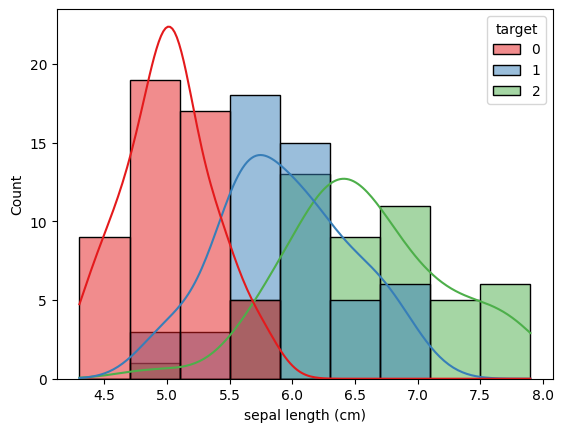

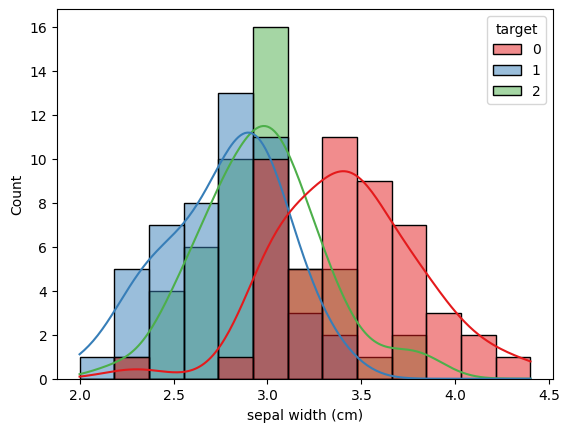

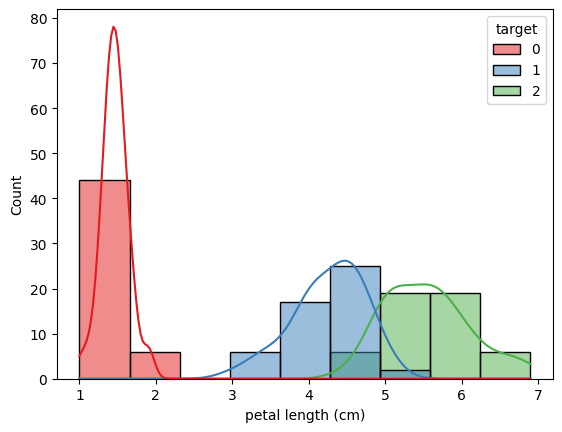

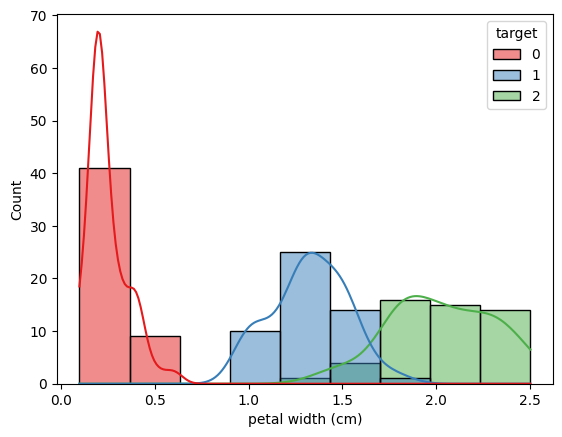

In [5]:
for col in iris.feature_names:
    fig = plt.figure()
    sns.histplot(df, x=col, hue="target", kde=True, palette="Set1")
    plt.show()
    

# Feature engineering

In [6]:
# one-hot vectorに変換
y = pd.get_dummies(df["target"]).to_numpy()
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=42)

# 0 ~ 1に正規化
mm = MinMaxScaler()
train_x = mm.fit_transform(train_x)
valid_x = mm.transform(valid_x)

# Model training

In [7]:
import tensorflow as tf

2024-08-22 13:04:15.690094: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer="Adam", loss=loss, metrics=["accuracy"])
hist = model.fit(train_x, train_y, batch_size=10, epochs=100, validation_data=(valid_x, valid_y))

Epoch 1/100


2024-08-22 13:04:19.007260: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 47069 MB memory:  -> device: 0, name: Quadro RTX 8000, pci bus id: 0000:01:00.0, compute capability: 7.5
2024-08-22 13:04:19.007985: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 47190 MB memory:  -> device: 1, name: Quadro RTX 8000, pci bus id: 0000:41:00.0, compute capability: 7.5
2024-08-22 13:04:20.916372: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fa74c112870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-22 13:04:20.916429: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 8000, Compute Capability 7.5
2024-08-22 13:04:20.916438: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): Quadro RTX 8000, Compute Capability 7.5
202

12/12 [==============================] - 3s 24ms/step - loss: 1.0404 - accuracy: 0.3083 - val_loss: 0.9247 - val_accuracy: 0.6000
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8685 - accuracy: 0.6500 - val_loss: 0.7458 - val_accuracy: 0.7000
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6791 - accuracy: 0.6583 - val_loss: 0.5681 - val_accuracy: 0.7000
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5327 - accuracy: 0.6667 - val_loss: 0.4640 - val_accuracy: 0.7333
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4526 - accuracy: 0.8417 - val_loss: 0.4082 - val_accuracy: 0.8667
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4111 - accuracy: 0.7667 - val_loss: 0.3708 - val_accuracy: 0.9333
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3675 - accuracy: 0.9250 - val_loss: 0.3375 - val_accuracy: 0.9333
Epoch 8/100
12/12 [=====

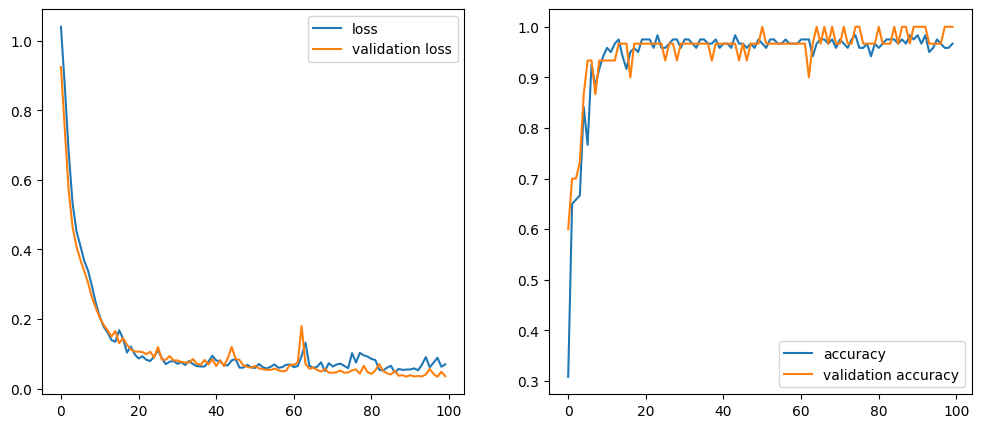

In [10]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
ax1.plot(hist.history["loss"], label="loss")
ax1.plot(hist.history["val_loss"], label="validation loss")
ax1.legend()
ax2 = fig.add_subplot(122)
ax2.plot(hist.history["accuracy"], label="accuracy")
ax2.plot(hist.history["val_accuracy"], label="validation accuracy")
ax2.legend()
plt.show()